<a href="https://colab.research.google.com/github/damoralesr/MetNumUN2022II/blob/main/damoralesr_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.4 MB/s 


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>

# About Me:

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**My own example 1**

In [ ]:
l1 = ["car", 23, 45, 4.6, "plane", 9.3, "boat"]
l1

['car', 23, 45, 4.6, 'plane', 9.3, 'boat']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My own example 2**

In [ ]:
first1 = l1[0]
second1 = l1[1]
print("first:", first1)
print("second:", second1)

first: car
second: 23


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My own example 3**

In [ ]:
last1 = l1[-1]
antepenultimate1 = l1[-3]
print("last:", last1)
print("second to last:", antepenultimate1)

last: boat
second to last: plane


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My own example 4**

In [ ]:
sublist1 = l1[2:5]
sublist1

[45, 4.6, 'plane']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My own example 5**

In [ ]:
first_two1 = l1[:2]
first_two1

['car', 23]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My own example 6**

In [ ]:
after_four1 = l1[4:]
after_four1

['plane', 9.3, 'boat']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My own example 7**

In [ ]:
l2 = [1, 2, 3, 4, 5, 6, 7 , 8, 9, 10]
l2[2:8:4]

[3, 7]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**My own example 8**

In [ ]:
l2[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My own example 9**

In [ ]:
l3 = ["apple", "pear", "banana", "cherry"]
print("Before:", l3)
l3.append("grape")
print("After:", l3)

Before: ['apple', 'pear', 'banana', 'cherry']
After: ['apple', 'pear', 'banana', 'cherry', 'grape']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My own example 10**

In [ ]:
l4 = ["a", "b", "c", "d"]
[x * 3 for x in l4]

['aaa', 'bbb', 'ccc', 'ddd']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

**My own example 11**

In [ ]:
actors = {"Brad": "Pitt", "Johnny": "Deep", "J.k": "Simmons", "Leonardo": "Dicaprio"}
actors

{'Brad': 'Pitt', 'J.k': 'Simmons', 'Johnny': 'Deep', 'Leonardo': 'Dicaprio'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**My own example 12**

In [ ]:
actors['Joaquin'] = 'Fenix'
actors

{'Brad': 'Pitt',
 'J.k': 'Simmons',
 'Joaquin': 'Fenix',
 'Johnny': 'Deep',
 'Leonardo': 'Dicaprio'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

**My own example 13**

In [ ]:
del actors['Brad']
actors

{'J.k': 'Simmons',
 'Joaquin': 'Fenix',
 'Johnny': 'Deep',
 'Leonardo': 'Dicaprio'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

**My own example 14**

In [ ]:
actors['Brad':'Joaquin']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My own example 15**

In [ ]:
c = [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18],
     [19, 20, 21],
     [22, 23, 24]]

d = [[1, 2, 3, 4, 5],
     [2, 9, 7, 8, 6]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 51.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 16**

In [ ]:
%%time

matmul(c, d)

CPU times: user 113 µs, sys: 0 ns, total: 113 µs
Wall time: 120 µs


[[32, 119, 107, 128, 116],
 [41, 152, 137, 164, 149],
 [50, 185, 167, 200, 182],
 [59, 218, 197, 236, 215],
 [68, 251, 227, 272, 248]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7574553888993543, 0.8091497295269251, 0.5340230245418278],
 [0.36863956341813775, 0.5825052056460691, 0.3484368737446234]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 12.3 s, sys: 59.4 ms, total: 12.3 s
Wall time: 14.1 s


**My own example 17**

In [ ]:
%%time
randa1 = random_matrix(800, 60)
randb1 = random_matrix(60, 500)
y = matmul(randa1, randb1)

CPU times: user 7.16 s, sys: 39.5 ms, total: 7.2 s
Wall time: 7.23 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My own example 18**

In [ ]:
list_data1 = [float(i) for i in range(50000)]
array_data1 = np.array(list_data1)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.5 ms, sys: 14 µs, total: 13.5 ms
Wall time: 14.4 ms


333328333350000.0

**My own example 19**

In [ ]:
%%time
python_dot_product(list_data1, list_data1)

CPU times: user 7.91 ms, sys: 0 ns, total: 7.91 ms
Wall time: 9.87 ms


41665416675000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 208 µs, sys: 0 ns, total: 208 µs
Wall time: 215 µs


333328333350000.0

**My own example 20**

In [ ]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 96 µs, sys: 3 µs, total: 99 µs
Wall time: 105 µs


41665416675000.0

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My own example 21**

In [ ]:
mul_elemwise([10, 45, 34, 64], [3, 2 + 0j, 4.5, "seven"])

[30,
 (90+0j),
 153.0,
 'sevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevensevenseven']

In [ ]:
import py_compile

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
source_code = 'd - b / 4 + e * f'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (d)
              2 LOAD_NAME                1 (b)
              4 LOAD_CONST               0 (4)
              6 BINARY_TRUE_DIVIDE
              8 BINARY_SUBTRACT
             10 LOAD_NAME                2 (e)
             12 LOAD_NAME                3 (f)
             14 BINARY_MULTIPLY
             16 BINARY_ADD
             18 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My own example 22**

In [ ]:
data1 = np.array([13, 45, 63, 24, 62, 4])
data1

array([13, 45, 63, 24, 62,  4])

In [ ]:
data + data

array([2, 4, 6, 8])

**My own example 23**

In [ ]:
data1 + data1

array([ 26,  90, 126,  48, 124,   8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.47 ms, sys: 1.02 ms, total: 2.49 ms
Wall time: 4.16 ms


333328333350000.0

**My own example 24**

In [ ]:
%%time
(array_data1 * array_data1).sum()

CPU times: user 1.58 ms, sys: 18 µs, total: 1.6 ms
Wall time: 1.67 ms


41665416675000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.48 ms, sys: 986 µs, total: 2.46 ms
Wall time: 2.21 ms


333328333350000.0

**My own example 25**

In [ ]:
%%time
array_data1.dot(array_data1)

CPU times: user 141 µs, sys: 5 µs, total: 146 µs
Wall time: 77.2 µs


41665416675000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 336 µs, sys: 0 ns, total: 336 µs
Wall time: 254 µs


333328333350000.0

**My own example 26**

In [ ]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 237 µs, sys: 0 ns, total: 237 µs
Wall time: 150 µs


41665416675000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
np.append(data, 3)

array([1, 2, 3, 4, 3])

In [ ]:
np.append(data, [5, 4, 3])

array([1, 2, 3, 4, 5, 4, 3])

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**My own example 27**

In [ ]:
three_by_two = data1.reshape(3, 2)
three_by_two

array([[13, 45],
       [63, 24],
       [62,  4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My own example 28**

In [ ]:
arr = np.array([10, 21, 34, 45, 56, 67, 78, 89, 91], dtype='int16').reshape(3, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[10 21 34]
 [45 56 67]
 [78 89 91]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\n\x00\x15\x00"\x00-\x008\x00C\x00N\x00Y\x00[\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My own example 29**

In [ ]:
data1 = np.arange(24).reshape(6, 4)
data1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My own example 30**

In [ ]:
data1*data1

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361],
       [400, 441, 484, 529]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

**My own example 31**

In [ ]:
np.sqrt(data1)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335],
       [4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

**My own example 32**

In [ ]:
(data1 % 8) == 3

array([[False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

**My own example 33**

In [ ]:
(((data1 % 2) == 1) & ((data1 % 3) == 0)) | ((data1 % 4) == 1)

array([[False,  True, False,  True],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False],
       [False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My own example 34**

In [ ]:
data1 @ data1.T

array([[  14,   38,   62,   86,  110,  134],
       [  38,  126,  214,  302,  390,  478],
       [  62,  214,  366,  518,  670,  822],
       [  86,  302,  518,  734,  950, 1166],
       [ 110,  390,  670,  950, 1230, 1510],
       [ 134,  478,  822, 1166, 1510, 1854]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My own example 35**

In [ ]:
sines1 = np.sin(np.linspace(0, 4.23, 32))
cosines1 = np.cos(np.linspace(0, 3.45, 43))
cosines1

array([ 1.        ,  0.99662817,  0.98653543,  0.96978983,  0.9465043 ,
        0.91683587,  0.88098461,  0.8391923 ,  0.79174077,  0.73895   ,
        0.68117602,  0.61880841,  0.55226778,  0.48200284,  0.40848744,
        0.33221734,  0.25370688,  0.17348551,  0.09209422,  0.01008187,
       -0.07199847, -0.15359327, -0.23415229, -0.31313228, -0.3900006 ,
       -0.4642389 , -0.53534652, -0.60284396, -0.66627602, -0.72521495,
       -0.77926327, -0.82805652, -0.87126563, -0.90859923, -0.93980555,
       -0.96467415, -0.98303731, -0.99477121, -0.99979671, -0.99807993,
       -0.98963244, -0.97451121, -0.95281821])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My own example 36**

In [ ]:
cosines1[3]

0.9697898261192058

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

**My own example 37**

In [ ]:
sines1[:5]

array([0.        , 0.13602857, 0.26952835, 0.39801755, 0.51910754])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My own example 38**

In [ ]:
sines1[7:]

array([ 0.81640689,  0.88737171,  0.94184013,  0.97879958,  0.99756297,
        0.99778151,  0.97945111,  0.94291255,  0.88884508,  0.81825383,
        0.7324511 ,  0.63303198,  0.52184469,  0.40095621,  0.27261389,
        0.13920363,  0.00320555, -0.13285212, -0.26644005, -0.39507481,
       -0.51636506, -0.628056  , -0.72807127, -0.81455157, -0.88588921])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

**My own example 39**

In [ ]:
sines1[::5]

array([ 0.        ,  0.63054723,  0.97879958,  0.88884508,  0.40095621,
       -0.26644005, -0.81455157])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


**My own example 40**

In [ ]:
print("cosines:\n", cosines1)
print("cosines > 0.88:\n", cosines1 > 0.88)
print("cosines[cosines > 0.78]:\n", cosines1[cosines1 > 0.78])

cosines:
 [ 1.          0.99662817  0.98653543  0.96978983  0.9465043   0.91683587
  0.88098461  0.8391923   0.79174077  0.73895     0.68117602  0.61880841
  0.55226778  0.48200284  0.40848744  0.33221734  0.25370688  0.17348551
  0.09209422  0.01008187 -0.07199847 -0.15359327 -0.23415229 -0.31313228
 -0.3900006  -0.4642389  -0.53534652 -0.60284396 -0.66627602 -0.72521495
 -0.77926327 -0.82805652 -0.87126563 -0.90859923 -0.93980555 -0.96467415
 -0.98303731 -0.99477121 -0.99979671 -0.99807993 -0.98963244 -0.97451121
 -0.95281821]
cosines > 0.88:
 [ True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
cosines[cosines > 0.78]:
 [1.         0.99662817 0.98653543 0.96978983 0.9465043  0.91683587
 0.88098461 0.8391923  0.79174077]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

**My own example 41**

In [ ]:
print(sines1)
sines1[[0, 1, 2, 8, 10]]

[ 0.          0.13602857  0.26952835  0.39801755  0.51910754  0.63054723
  0.73026494  0.81640689  0.88737171  0.94184013  0.97879958  0.99756297
  0.99778151  0.97945111  0.94291255  0.88884508  0.81825383  0.7324511
  0.63303198  0.52184469  0.40095621  0.27261389  0.13920363  0.00320555
 -0.13285212 -0.26644005 -0.39507481 -0.51636506 -0.628056   -0.72807127
 -0.81455157 -0.88588921]


array([0.        , 0.13602857, 0.26952835, 0.88737171, 0.97879958])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My own example 42**

In [ ]:
unsorted_data1 = np.array([12, -53, 28, -142, -10, 5, 2, 23, 100])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**My own example 43**

In [ ]:
sort_indices1 = np.argsort(unsorted_data1)
sort_indices1

array([3, 1, 4, 6, 5, 0, 7, 2, 8])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**My own example 44**

In [ ]:
unsorted_data1[sort_indices1]

array([-142,  -53,  -10,    2,    5,   12,   23,   28,  100])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My own example 45**

In [ ]:
market_caps1 = np.array([18, 61, 14, 15, 8, 16])
assets1 = np.array(['c', 'v', 'x', 'f', 'z', 'p'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

**My own example 46**

In [ ]:
sort_by_mcap1 = np.argsort(market_caps1)
assets1[sort_by_mcap1]

array(['z', 'x', 'f', 'p', 'c', 'v'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


**My own example 47**

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My own example 48**

In [ ]:
data1 = np.arange(45).reshape(9, 5)
data1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My own example 49**

In [ ]:
data1[:3, :7] 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My own example 50**

In [ ]:
data1[:3, [1, -3]]

array([[ 1,  2],
       [ 6,  7],
       [11, 12]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My own example 51**

In [ ]:
data1[(data1[:, 0] % 4) == 0]

array([[ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [40, 41, 42, 43, 44]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.038671618812607

In [ ]:
variance(np.random.standard_normal(10000))

1.0102507482754846

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

**My own example 52**

In [ ]:
data1 = np.arange(56)
data1.mean()

27.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My own example 53**

In [ ]:
data1 = np.arange(42).reshape(6, 7)
data1

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])

In [ ]:
data.mean()

14.5

**My own example 54**

In [ ]:
data1.mean()

20.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

**My own example 55**

In [ ]:
data1.mean(axis=0)

array([17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

**My own example 56**

In [ ]:
data1.mean(axis=1)

array([ 3., 10., 17., 24., 31., 38.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**My own example 57**

In [ ]:
row1 = np.array([23, 34, 56, 78, 91])
column1 = np.array([[5], [6], [7], [8]])
print("Row:\n", row1, sep='')
print("Column:\n", column1, sep='')

Row:
[23 34 56 78 91]
Column:
[[5]
 [6]
 [7]
 [8]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

**My own example 58**

In [ ]:
row1 + column1

array([[28, 39, 61, 83, 96],
       [29, 40, 62, 84, 97],
       [30, 41, 63, 85, 98],
       [31, 42, 64, 86, 99]])

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


**My own example 59**

In [ ]:
print("Data:\n", data1, sep='')
print("Mean:\n", data1.mean(axis=1), sep='')
print("Data - Mean:\n", data1 - data1.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]]
Mean:
[ 3. 10. 17. 24. 31. 38.]
Data - Mean:
[[-17.5 -17.5 -17.5 -17.5 -17.5 -17.5 -17.5]
 [-10.5 -10.5 -10.5 -10.5 -10.5 -10.5 -10.5]
 [ -3.5  -3.5  -3.5  -3.5  -3.5  -3.5  -3.5]
 [  3.5   3.5   3.5   3.5   3.5   3.5   3.5]
 [ 10.5  10.5  10.5  10.5  10.5  10.5  10.5]
 [ 17.5  17.5  17.5  17.5  17.5  17.5  17.5]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**My own example 60**

In [ ]:
s1 = pd.Series(index=['as', 'es', 'is', 'os', 'us'], data=[34, 23, 32, 44, 65])
s1

as    34
es    23
is    32
os    44
us    65
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**My own example 61**

In [ ]:
print("The index is:", s1.index)
print("The values are:", s1.values)

The index is: Index(['as', 'es', 'is', 'os', 'us'], dtype='object')
The values are: [34 23 32 44 65]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**My own example 62**

In [ ]:
s1.iloc[1]

23

In [ ]:
# ... or by label.
s.loc['a']

1

**My own example 63**

In [ ]:
s1.loc["us"]

65

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**My own example 64**

In [ ]:
s1.iloc[:5]

as    34
es    23
is    32
os    44
us    65
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**My own example 65**

In [ ]:
s1.loc[:'es']

as    34
es    23
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**My own example 66**

In [ ]:
s1.iloc[[1, -2]]

es    23
os    44
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**My own example 67**

In [ ]:
s1.loc[s1 >= 32]

as    34
is    32
os    44
us    65
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**My own example 68**

In [ ]:
other_s1 = pd.Series({'as': 12.2, 'es': 23.3, 'is': 34.4, 'os': 45.5})
other_s1

as    12.2
es    23.3
is    34.4
os    45.5
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**My own example 69**

In [ ]:
s1 + other_s1

as    46.2
es    46.3
is    66.4
os    89.5
us     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**My own example 70**

In [ ]:
(s1 + other_s1).fillna(0.0)

as    46.2
es    46.3
is    66.4
os    89.5
us     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


**My own example 71**

In [ ]:
goog = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/goog.csv', parse_dates=['Date'], index_col='Date')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2008-10-14,116.26,116.40
2008-10-13,104.55,110.53


**My own example 72**

In [ ]:
goog.iloc[:4, :2]

,Open,High
Date,,
2016-12-19,790.219971,797.659973
2016-12-20,796.760010,798.650024
2016-12-21,795.840027,796.676025
2016-12-22,792.359985,793.320007


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


**My own example 73**

In [ ]:
goog.loc[pd.Timestamp('2012-02-03'):pd.Timestamp('2012-03-05'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

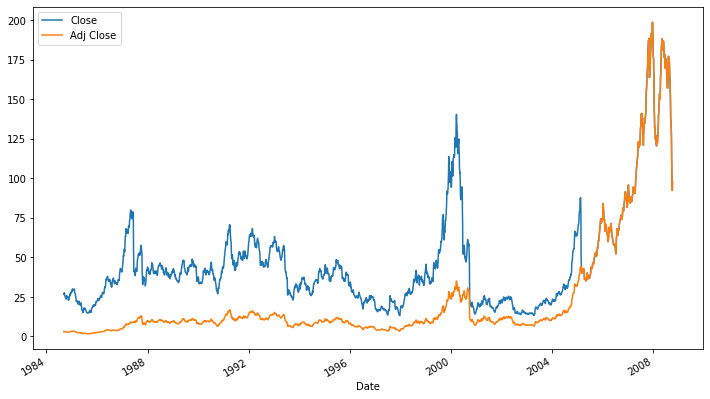

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**My own example 74**

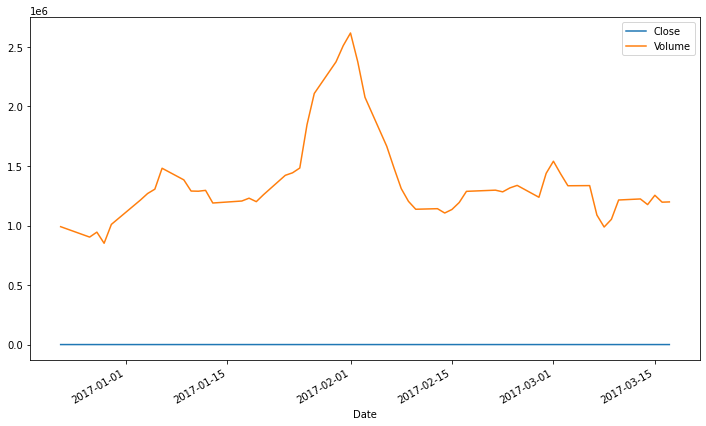

In [ ]:
goog.rolling(5)[['Close', 'Volume']].mean().plot();

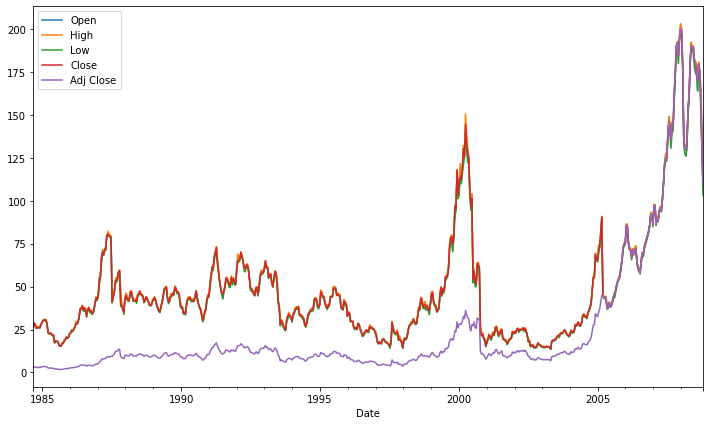

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

**My own example 75**

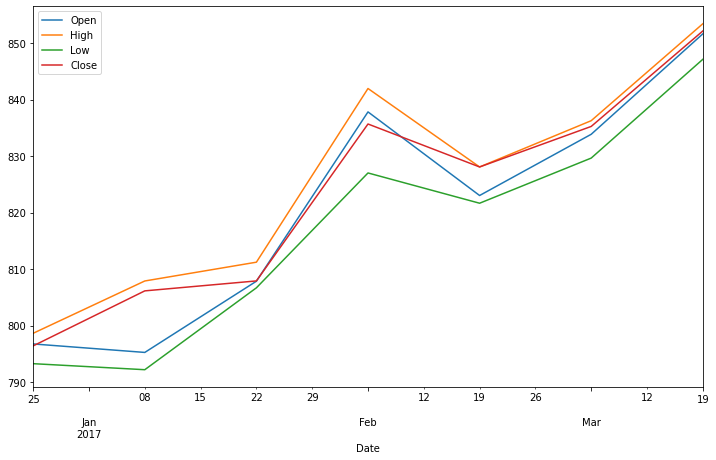

In [ ]:
goog.drop('Volume', axis=1).resample('2W').max().plot();

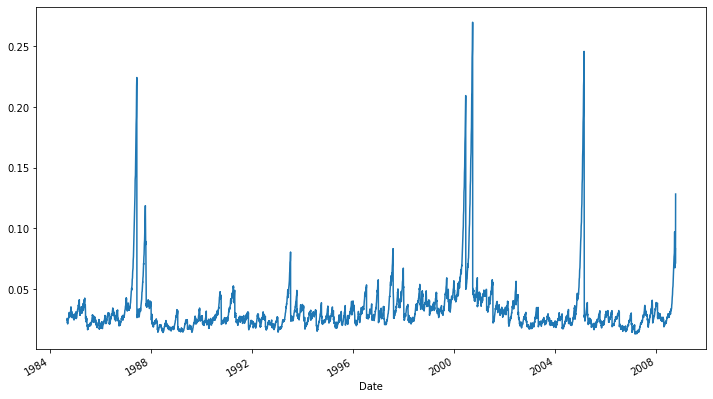

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**My own example 76**

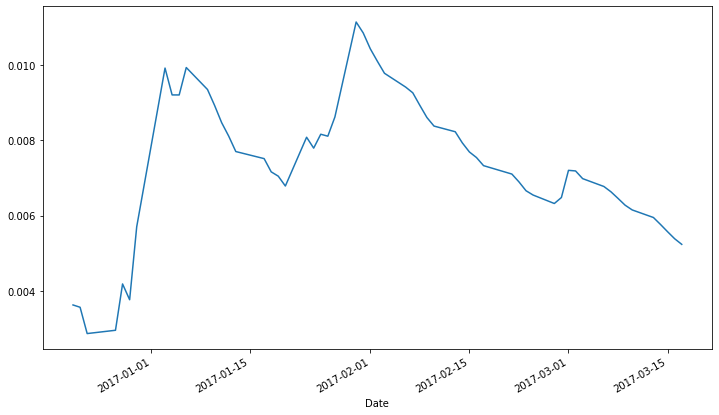

In [ ]:
goog['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:

from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv("https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv")
cars = cars.rename(columns={"Unnamed: 0": "Cars"})
cars

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

**My own example 77**

In [ ]:
cars.dtypes

Cars     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

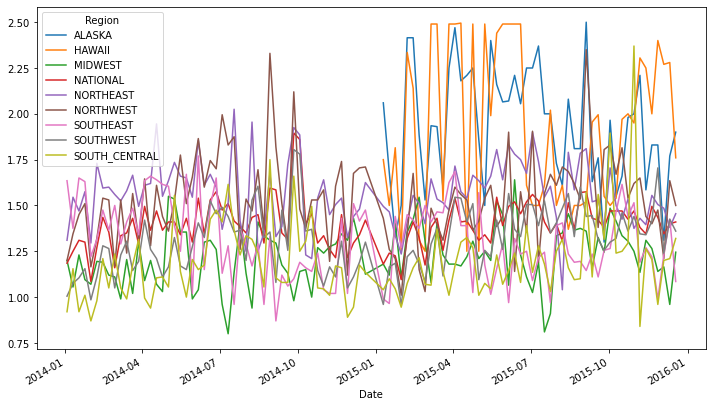

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

**My own example 78**

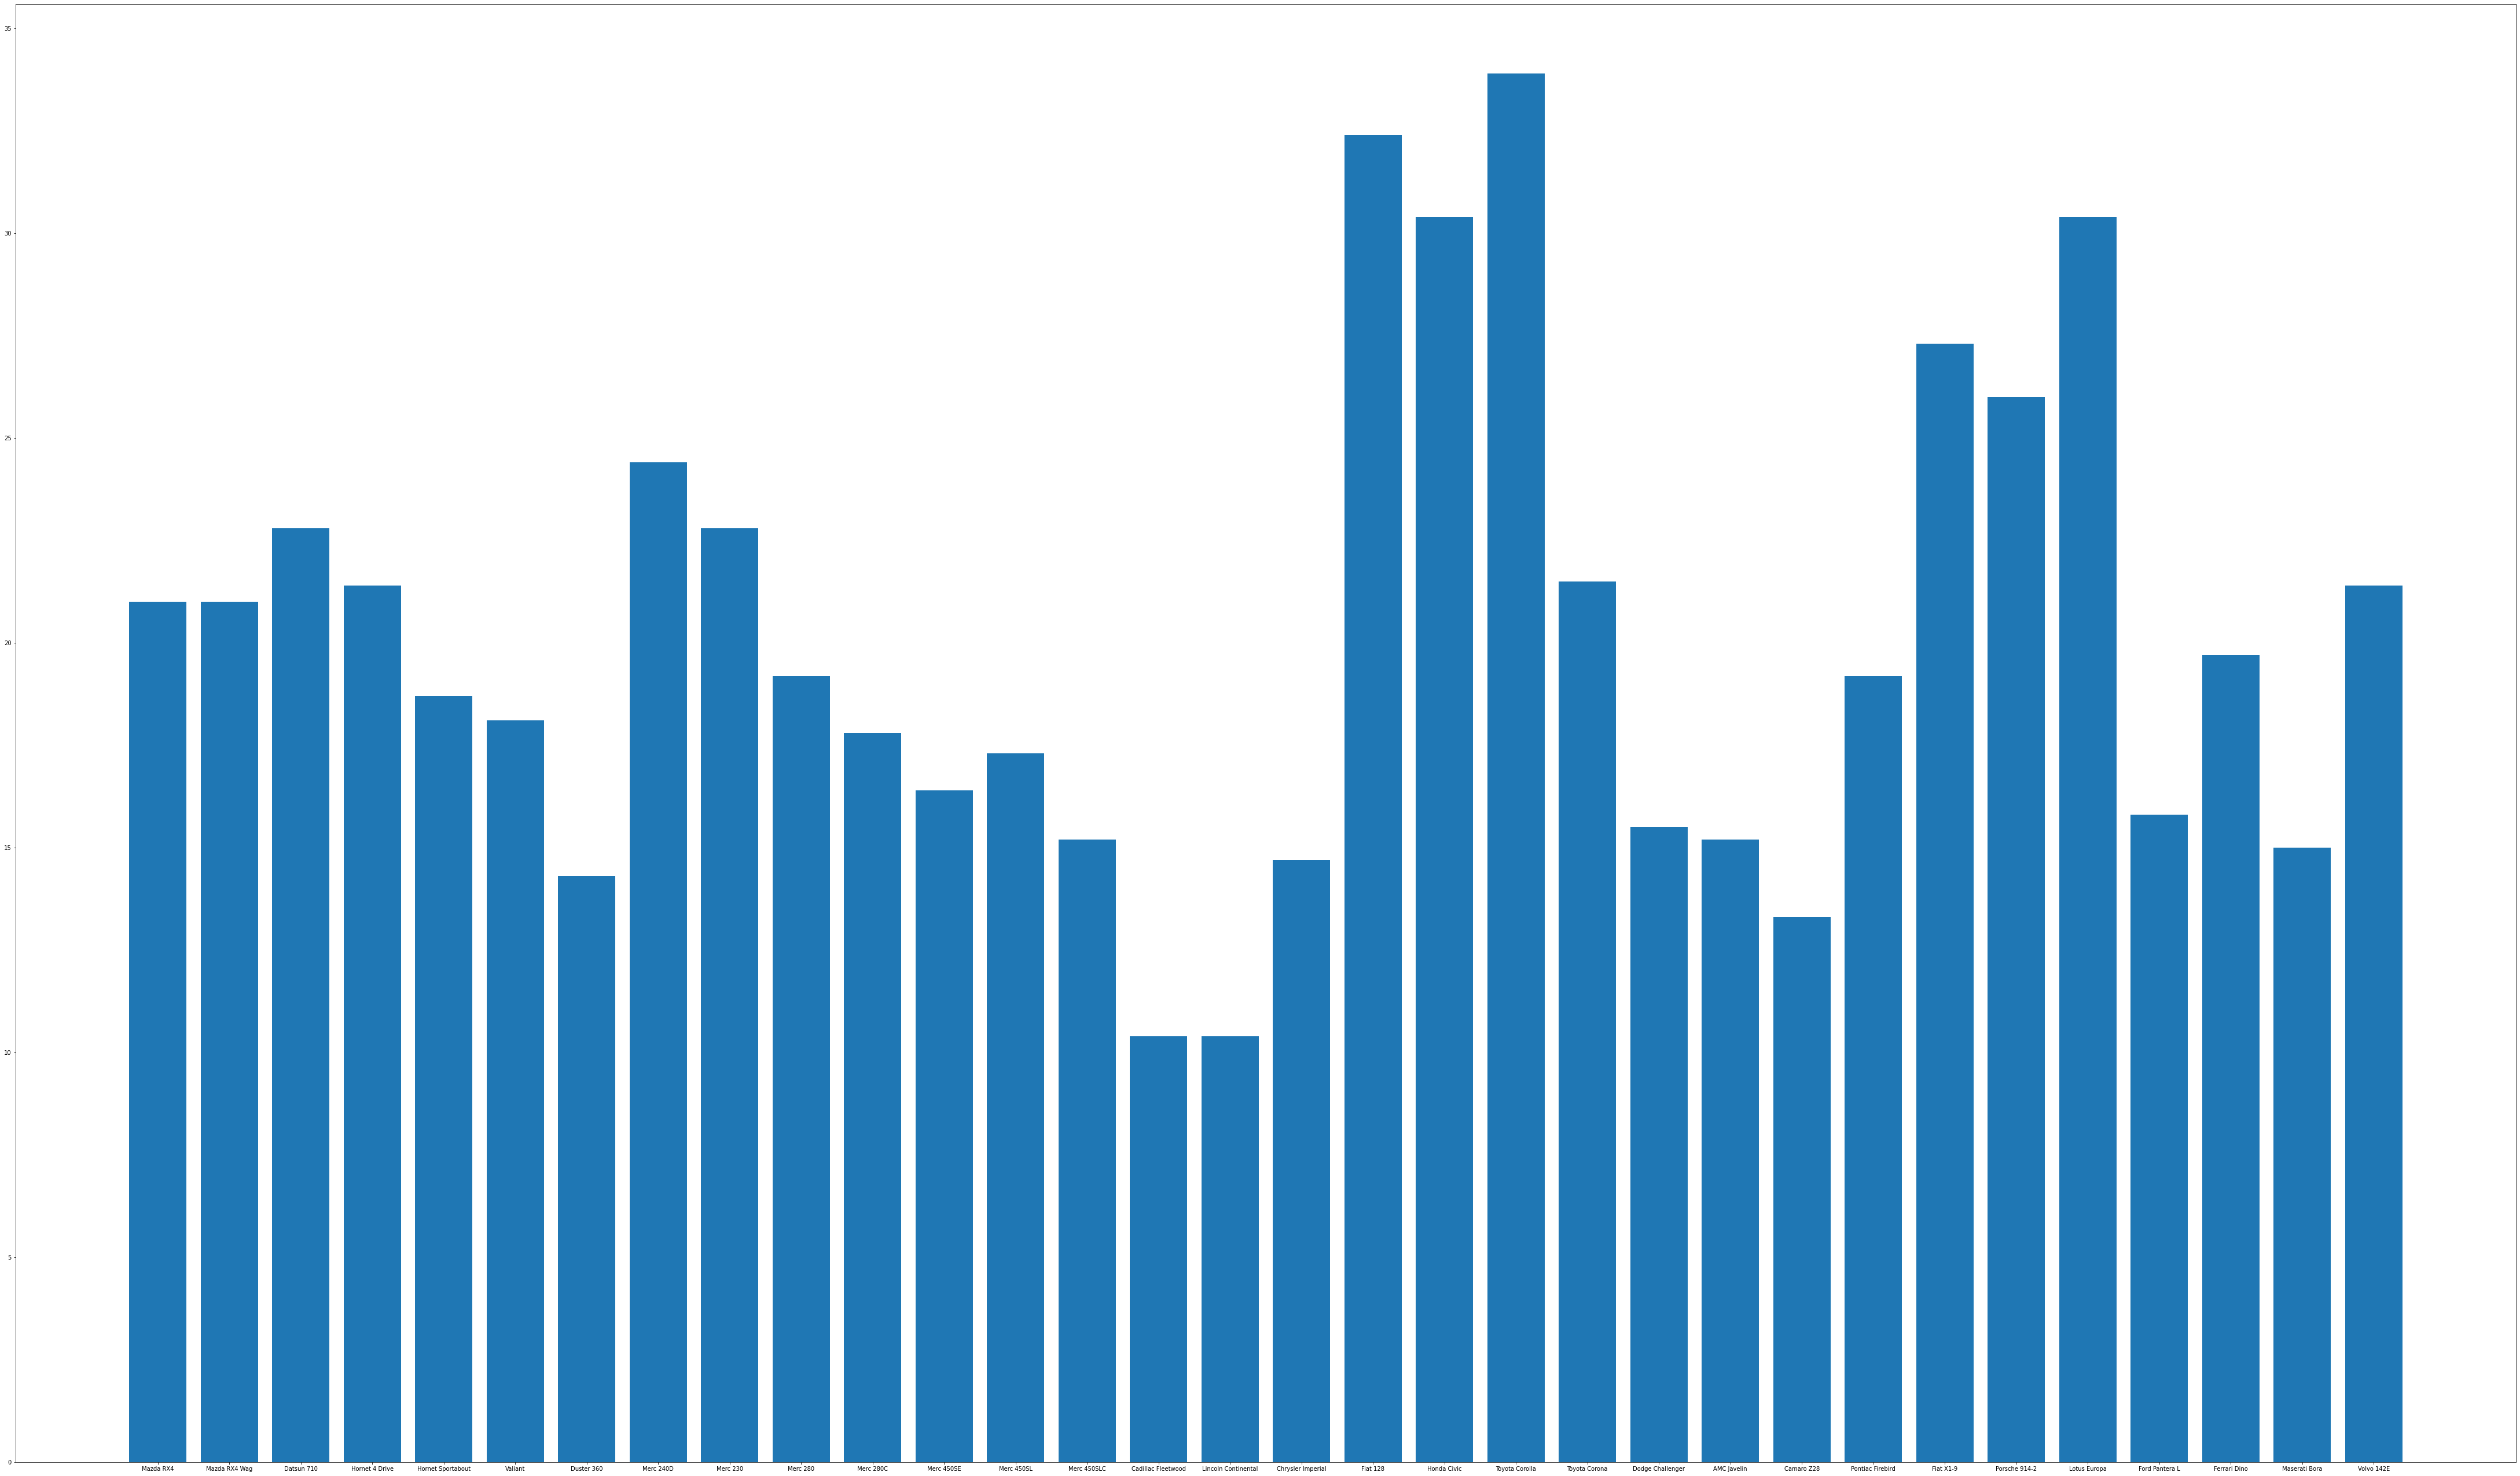

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["mpg"])
plt.show()

**My own example 79**

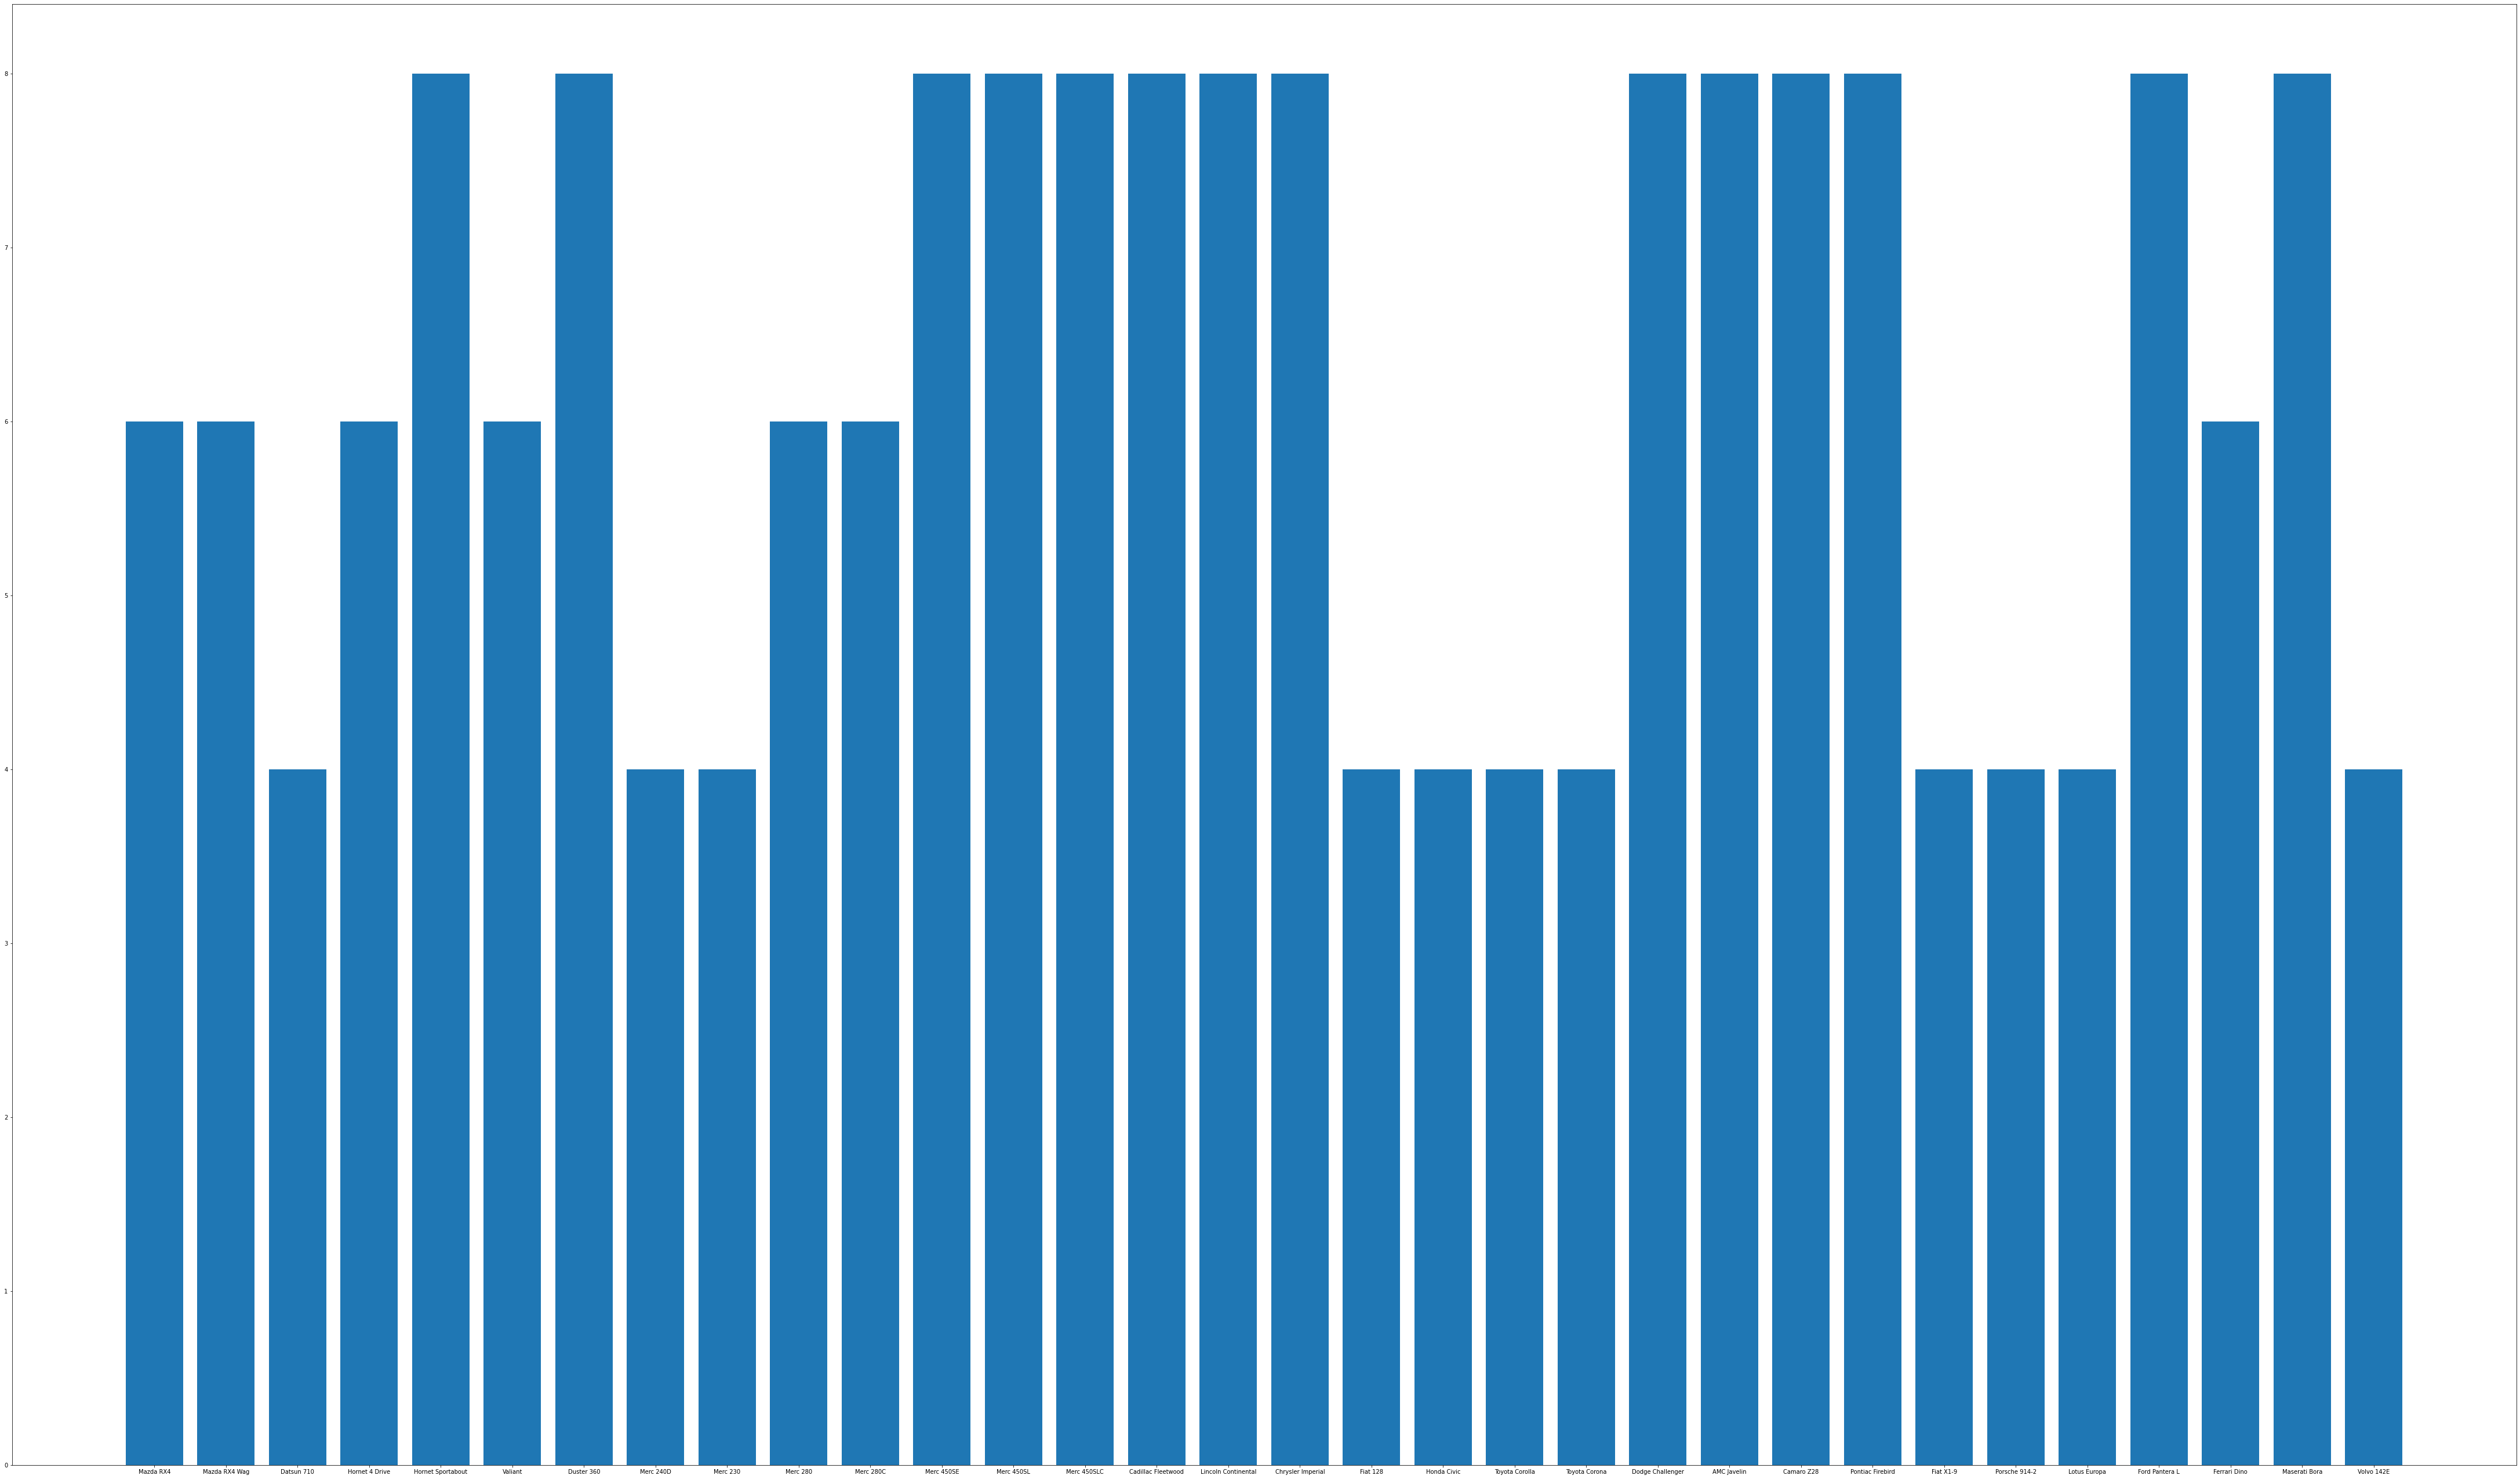

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["cyl"])
plt.show()

**My own example 80**

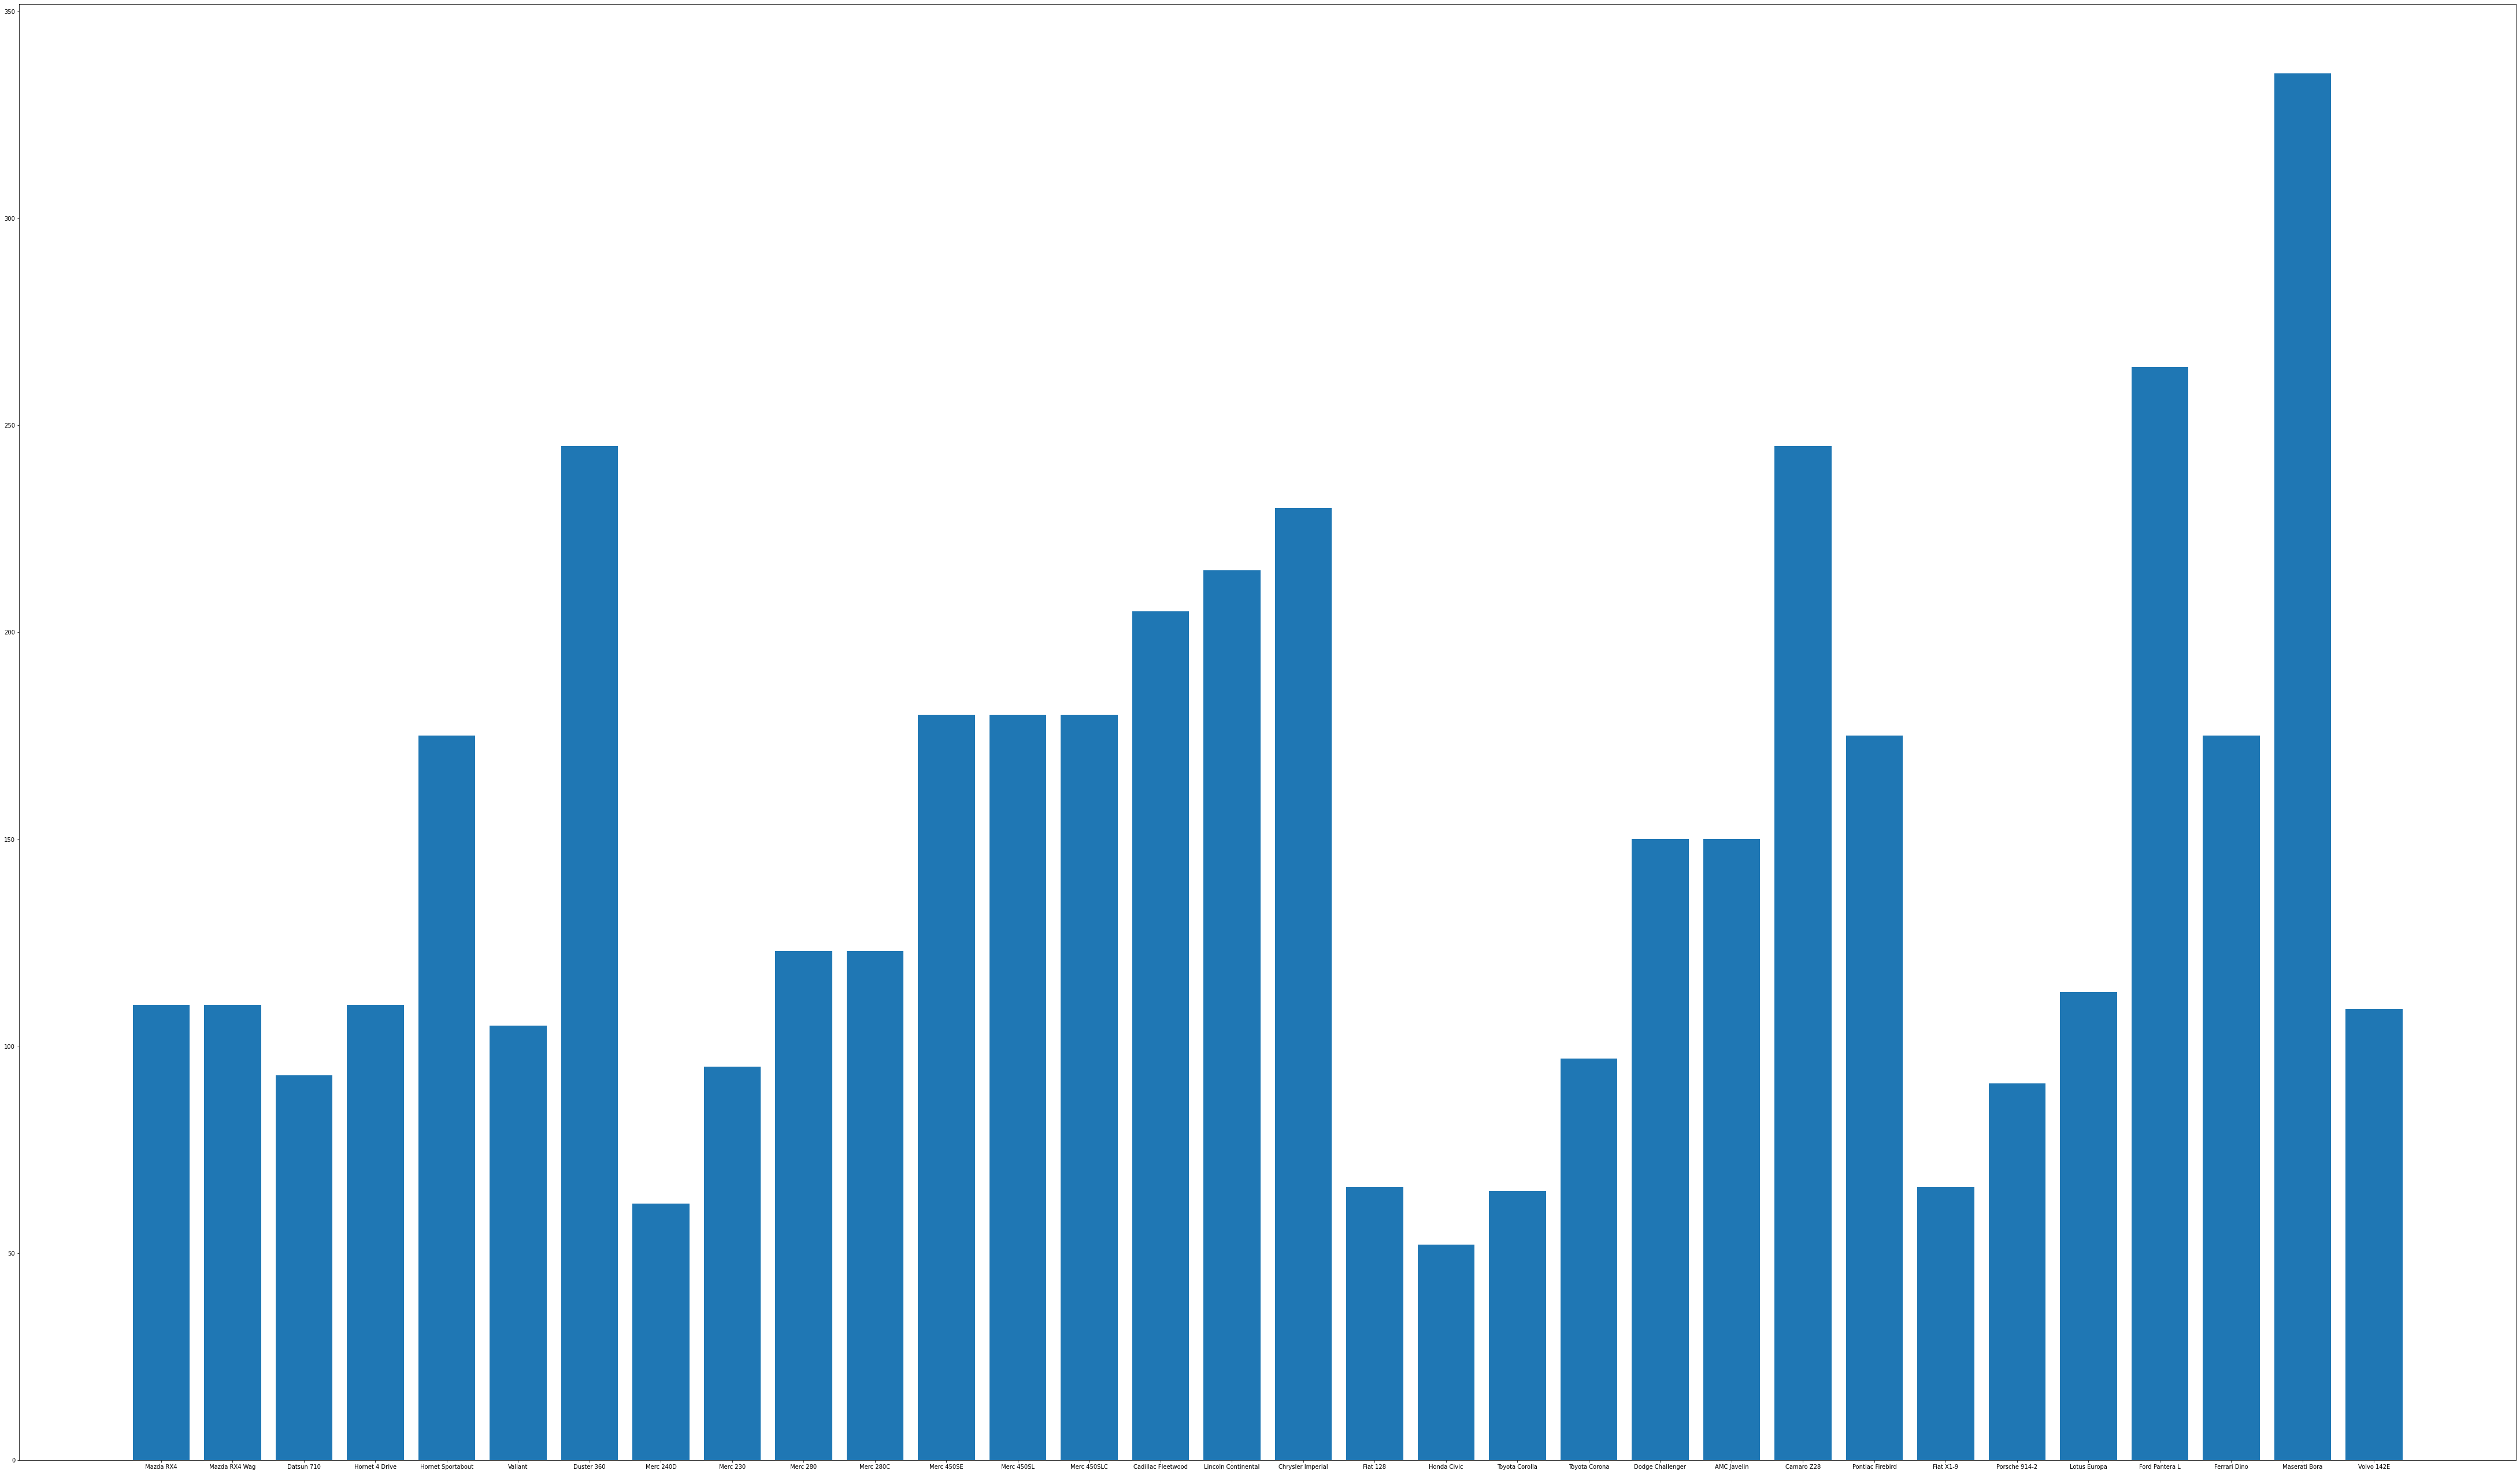

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["hp"])
plt.show()

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

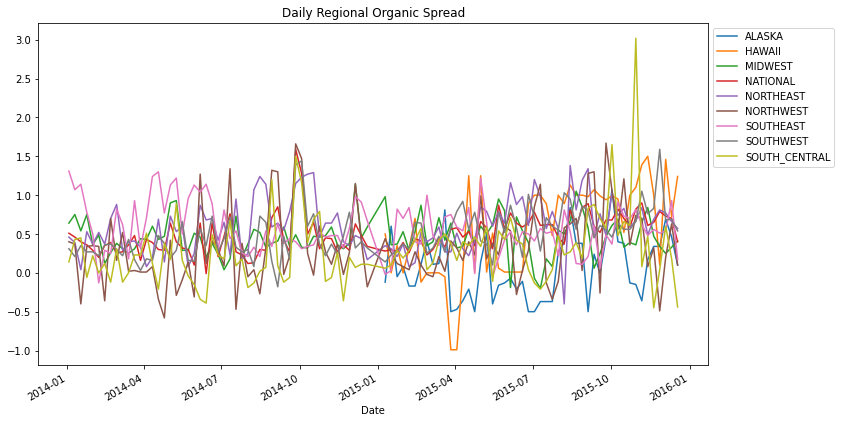

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


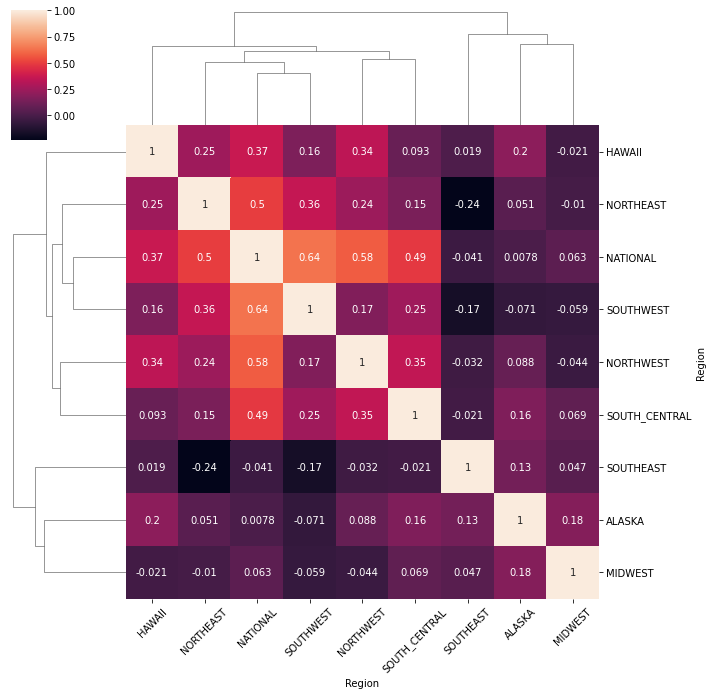

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!